In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
#-----------------Create X----------------------
x = np.full((2400,785),1)
for i in range(x.shape[0]):
    image_index = str(i+1)
    url = "./Train/"+image_index+".jpg"
    image = plt.imread(url)
    x[i] = np.append(image.flatten(),[1])
print(x.shape)
#-----------------Create T----------------------
t = np.full((2400,10),0)
for z in range(t.shape[1]):
    rangez = (z+1)*240
    for y in range(t.shape[0]):
        if(y>=rangez-240 and y<rangez):
            t[y][z]=1
        else:
            t[y][z]=-1
print(t.shape)

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]
(2400, 10)


In [17]:
#--------------------Calculate W=([Xt.X]-1)*Xt*t-------------------------------
x_transpose = np.transpose(x)
mul_x_t = np.matmul(x_transpose, x)
inverse_mul_x_t = np.linalg.pinv(mul_x_t)
mult_inverse_t = np.matmul(inverse_mul_x_t, x_transpose)
w = np.matmul(mult_inverse_t, t)
print(w.shape)

(785, 10)


In [18]:
#--------------------Create X_Test-------------------------------
x_test = np.full((200,785),1)
for i in range(x_test.shape[0]):
    image_index = str(i+1)
    url = "D:/GUC/Intranet/Faculties (Semester 9)/CSEN 1022 (Machine Learning)/Assignment/Test/"+image_index+".jpg"
    image = plt.imread(url)
    x_test[i] = np.append(image.flatten(),[1])
print(x_test.shape)

(200, 785)


In [21]:
#------------------Calculate y(x)=W.X+W0----------------
y = np.dot(x_test, w)
print(y[21])

[-0.93342356  0.75929292 -0.88234531 -1.02283716 -1.22890301 -0.89693455
 -1.14657751 -1.01397434 -0.51450094 -1.11979654]


In [10]:
def getmaxindex(array):
    max_index=0
    for i in range(array.size):
        if(array[max_index]<array[i]):
            max_index = i        
    return max_index

In [20]:
#------------------Create FinalSolution each row is an image and the column is the class it belongs to ---------------
final_sol = np.full((200,1),-1)
for i in range(y.shape[0]):
    final_sol[i][0] = getmaxindex(y[i])
print(final_sol[0])

[0]


In [12]:
#----------------Create Confusion Matrix-------------------------------------
confusion_matrix =np.full((10,10),0)
for i in range(final_sol.shape[0]):
    confusion_matrix[int(i/20)][final_sol[i][0]] = confusion_matrix[int(i/20)][final_sol[i][0]]+1
print(confusion_matrix)

[[19  0  0  0  0  0  1  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 1  3 11  2  2  1  0  0  0  0]
 [ 0  0  0 17  0  1  0  0  2  0]
 [ 0  0  0  0 17  1  0  1  0  1]
 [ 0  0  0  1  0 14  1  0  2  2]
 [ 0  0  0  0  0  0 20  0  0  0]
 [ 0  0  1  1  0  0  0 15  0  3]
 [ 0  0  1  0  0  3  0  0 15  1]
 [ 1  0  0  1  1  1  0  4  0 12]]


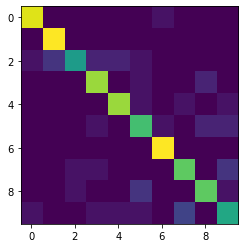

In [19]:
plt.imshow(confusion_matrix)

In [20]:
plt.imsave('Confusion.jpg', confusion_matrix)